#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install MiniSom

## Importing the libraries


In [2]:
import numpy as np
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [5]:
from minisom import MiniSom

som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train(data = X, num_iteration = 100)

##Visualizing the results


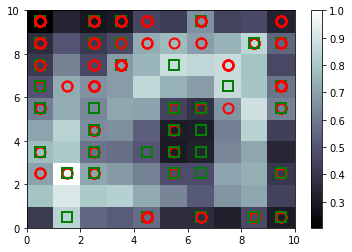

In [6]:
from pylab import bone, pcolor, colorbar, plot, show

bone() # This initializes the window or the convex at which the self organizing map will be polted on

pcolor(som.distance_map().T) # This will make the colors corresponds to the mean distances of the winning nodes to detect outliers on the colored data and detect the frauds 
# Here we are making the trasnpose to get the right order of the mean sqaure distance of each winning node

colorbar() # To create the legend

markers = ['o', 's']
colors = ['red', 'green']

for i, x in enumerate(X): # Here we want to access all the customers (i) and the whole vector of each customer (X)
  w = som.winner(x) # We get the winning node for each costumer for each customer to detect the outliers and mark them with being approved or not
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2) # Putting the marker on the center of the winning node which is coordinated on w[0] the X coordinate and w[1] the y coordinate
show()

## Finding the frauds


In [7]:
mappings = som.win_map(X)

#fruads = np.concatenate((mappings[(4,2)], mappings[(3,1)]), axis = 0)

fruads = mappings[(1,2)]

fruads = sc.inverse_transform(fruads)

##Printing the Fraunch Clients

In [8]:
print("IDs of possible fraunch: ")
for i in fruads[:, 0]:
  print(int(i))

IDs of possible fraunch: 
15585855
15597536
15661412
15571284
15591360
15570947
15641715
15589881
15592326
15671293
15602456
15580579
15568819
15665374


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [9]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [10]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in fruads:
    is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
customers = sc.fit_transform(customers)

In [12]:
customers.shape

(690, 15)

## Building the ANN

##Import Tensorflow

In [13]:
import tensorflow as tf

tf.__version__

'2.4.0'

## Initializing the ANN

In [14]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units = 2, kernel_initializer = 'uniform', activation  = 'relu', input_dim = 15))

In [16]:
ann.add(tf.keras.layers.Dense(units = 50, kernel_initializer = 'uniform', activation  = 'relu'))

In [17]:
ann.add(tf.keras.layers.Dense(units = 50, kernel_initializer = 'uniform', activation  = 'relu'))

## Adding the output layer

In [18]:
ann.add(tf.keras.layers.Dense(units = 1 , activation  = 'sigmoid'))

## Training the ANN

## Compiling the ANN

In [19]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

## Training the ANN on the Training set

In [20]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 100)

Epoch 1/100
690/690 [==============================] - 1s 1ms/step - loss: 0.2841 - accuracy: 0.9810
Epoch 2/100
690/690 [==============================] - 1s 1ms/step - loss: 0.0813 - accuracy: 0.9858
Epoch 3/100
690/690 [==============================] - 1s 1ms/step - loss: 0.1375 - accuracy: 0.9623
Epoch 4/100
690/690 [==============================] - 1s 1ms/step - loss: 0.0458 - accuracy: 0.9908
Epoch 5/100
690/690 [==============================] - 1s 1ms/step - loss: 0.0670 - accuracy: 0.9840
Epoch 6/100
690/690 [==============================] - 1s 1ms/step - loss: 0.0545 - accuracy: 0.9857
Epoch 7/100
690/690 [==============================] - 1s 1ms/step - loss: 0.0652 - accuracy: 0.9810
Epoch 8/100
690/690 [==============================] - 1s 1ms/step - loss: 0.0643 - accuracy: 0.9810
Epoch 9/100
690/690 [==============================] - 1s 1ms/step - loss: 0.0496 - accuracy: 0.9843
Epoch 10/100
690/690 [==============================] - 1s 1ms/step - loss: 0.0515 - accura

## Predicting test set results

In [21]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [22]:
print(y_pred)

[[1.56647200e+07 0.00000000e+00]
 [1.57821590e+07 0.00000000e+00]
 [1.56220830e+07 0.00000000e+00]
 ...
 [1.57779940e+07 7.85251141e-01]
 [1.55709470e+07 7.85302520e-01]
 [1.55712840e+07 7.85302758e-01]]
